In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from collections import Counter
import numpy as np
import scipy as sp

In [3]:
data = pd.read_csv('Chicago Crimes.csv',memory_map = True)
chicn = pd.read_csv('ChicagoComName.csv',memory_map = True)
data = data.merge(chicn, how = 'inner', on = 'Community Area')
data.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Police Beats,Community Name,Sides,population,income,latinos,blacks,white,asian,other
0,11760524,JC352123,07/16/2019 11:55:00 PM,002XX E 32ND ST,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,169.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
1,11761746,JC353532,07/16/2019 11:00:00 PM,035XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,GAS STATION,False,True,...,101.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
2,11760452,JC351998,07/16/2019 09:35:00 PM,035XX S RHODES AVE,0460,BATTERY,SIMPLE,STREET,False,False,...,101.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
3,11760450,JC351808,07/16/2019 07:00:00 PM,038XX S MICHIGAN AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,ALLEY,False,True,...,101.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
4,11760119,JC351662,07/16/2019 05:28:00 PM,038XX S DR MARTIN LUTHER KING JR DR,0560,ASSAULT,SIMPLE,GROCERY FOOD STORE,False,False,...,101.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022


In [34]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6308792 entries, 0 to 6308791
Data columns (total 39 columns):
ID                            int64
Case Number                   object
Date                          object
Block                         object
IUCR                          object
Primary Type                  object
Description                   object
Location Description          object
Arrest                        bool
Domestic                      bool
Beat                          int64
District                      float64
Ward                          float64
Community Area                float64
FBI Code                      object
X Coordinate                  float64
Y Coordinate                  float64
Year                          int64
Updated On                    object
Latitude                      float64
Longitude                     float64
Location                      object
Historical Wards 2003-2015    float64
Zip Codes                     float

(6308792, 39)

In [2]:
data.dropna(how = "any", inplace = True)
data.shape

(6220289, 30)

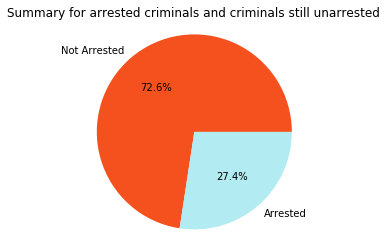

In [4]:
#Summary for arrested criminals and criminals still unarrested
arrest = data['Arrest']
countedarrest = Counter(arrest)
arrestsum = countedarrest.most_common()
#pie chart for arrested criminals
xal,ycnuma = zip(*arrestsum)
xal,ycnuma = list(xal),list(ycnuma)
xal[1] = 'Arrested'
xal[0] = 'Not Arrested'
colors = ['#F4511E','#B2EBF2']
plt.pie(ycnuma, labels = xal,autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.title('Summary for arrested criminals and criminals still unarrested')
plt.show()

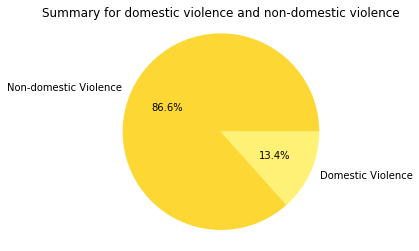

In [5]:
#Summary for domestic violence and non-domestic violence
domestic = data['Domestic']
counteddomestic = Counter(domestic)
domesticsum = counteddomestic.most_common()
#pie chart for domestic violence
xdl,ycnumd = zip(*domesticsum)
xdl,ycnumd = list(xdl),list(ycnumd)
xdl[1] = 'Domestic Violence'
xdl[0] = 'Non-domestic Violence'
colors = ['#FDD835','#FFF176']
plt.pie(ycnumd, labels = xdl,autopct='%1.1f%%',colors = colors)
plt.axis('equal')
plt.title('Summary for domestic violence and non-domestic violence')
plt.show()

In [6]:
data["Location Description"].value_counts()

STREET                            1604086
RESIDENCE                         1033956
APARTMENT                          676059
SIDEWALK                           635537
OTHER                              231590
PARKING LOT/GARAGE(NON.RESID.)     175507
ALLEY                              139534
SCHOOL, PUBLIC, BUILDING           129616
RESIDENCE-GARAGE                   120049
SMALL RETAIL STORE                 112112
RESIDENCE PORCH/HALLWAY            108957
VEHICLE NON-COMMERCIAL             104310
RESTAURANT                         100302
DEPARTMENT STORE                    77255
GROCERY FOOD STORE                  75961
RESIDENTIAL YARD (FRONT/BACK)       71896
GAS STATION                         68264
PARK PROPERTY                       48170
CHA PARKING LOT/GROUNDS             44426
COMMERCIAL / BUSINESS OFFICE        42578
BAR OR TAVERN                       34844
CTA PLATFORM                        32691
CHA APARTMENT                       28741
DRUG STORE                        

  Top 10 Location with highest Crime  Frequency of Crime
0                             STREET             1618490
1                          RESIDENCE             1053200
2                          APARTMENT              684373
3                           SIDEWALK              640598
4                              OTHER              237042
5     PARKING LOT/GARAGE(NON.RESID.)              178954
6                              ALLEY              140668
7           SCHOOL, PUBLIC, BUILDING              130397
8                   RESIDENCE-GARAGE              120843
9                 SMALL RETAIL STORE              114080


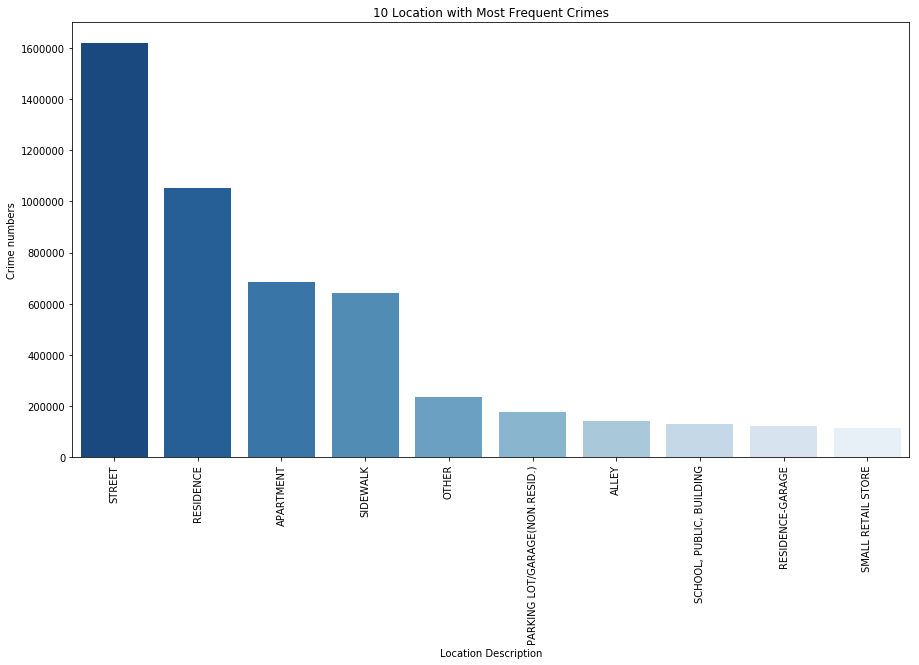

In [24]:
ldc = data['Location Description'].unique()
ldc_2 = data['Location Description']
ldc_3 = []
counted = Counter(ldc_2)
locmost_common = counted.most_common(10)
locd = pd.DataFrame(locmost_common, columns = ['Top 10 Location with highest Crime','Frequency of Crime'])
print(locd)
xloc,ycn = zip(*locmost_common)
xloc,ycn = list(xloc),list(ycn)

plt.figure(figsize=((15,8)))
ax = sns.barplot(x = xloc, y = ycn, palette = 'Blues_r')
plt.xticks(rotation = 90)
plt.xlabel('Location Description')
plt.ylabel('Crime numbers')
plt.title('10 Location with Most Frequent Crimes')
plt.show()

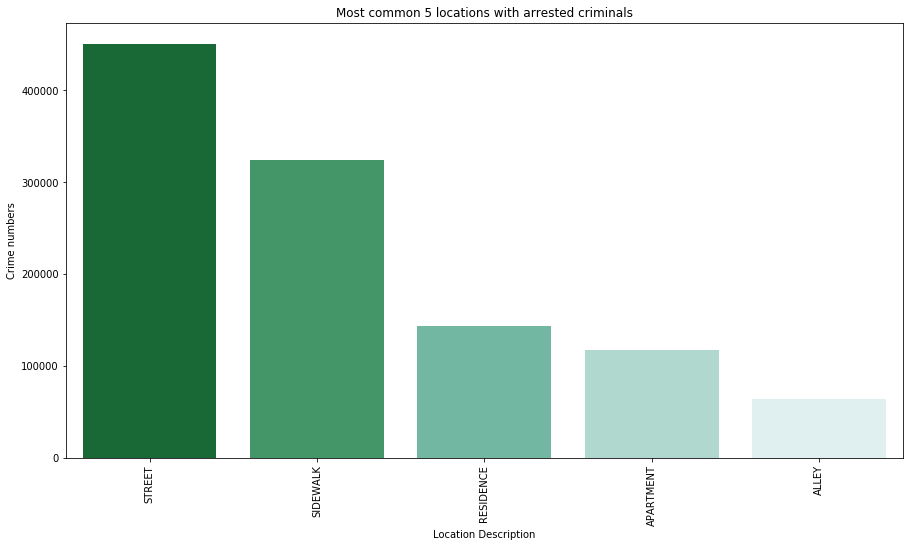

In [8]:
data['Arrest'] = data['Arrest'].astype('bool')
maskArr = data['Arrest']
dataa = data[maskArr]
ldac = dataa['Location Description'].unique()
ldac_2 = dataa['Location Description']
ldac_3 = []
countedac = Counter(ldac_2)
most_common = countedac.most_common(5)
xacloc,yaccn = zip(*most_common)
xacloc,yaccn = list(xacloc),list(yaccn)

plt.figure(figsize=((15,8)))
ax = sns.barplot(x = xacloc, y = yaccn, palette = 'BuGn_r')
plt.xticks(rotation = 90)
plt.xlabel('Location Description')
plt.ylabel('Crime numbers')
plt.title('Most common 5 locations with arrested criminals')
plt.show()

  Top 5 Location Description  Frequency of Crime(Arrested)
0                     STREET                       1163304
1                  RESIDENCE                        908212
2                  APARTMENT                        565613
3                   SIDEWALK                        313337
4                      OTHER                        194130


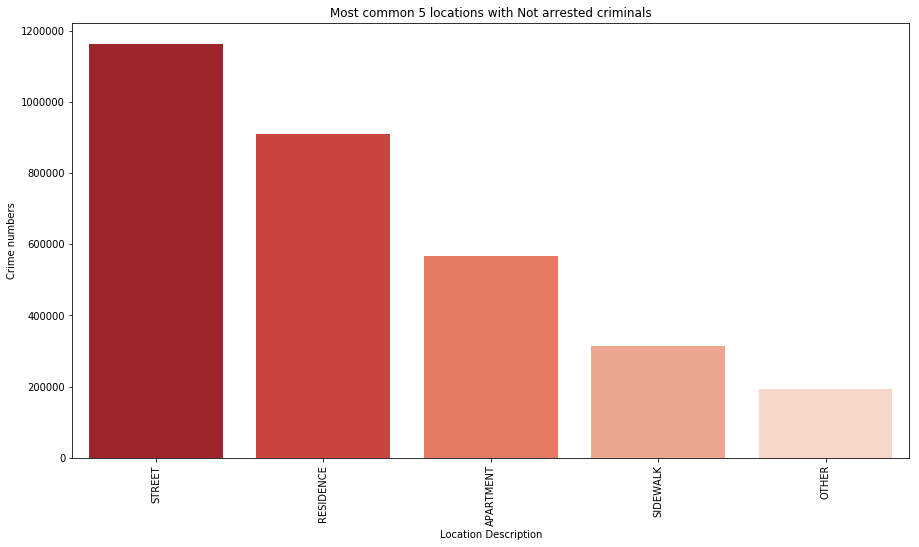

In [10]:
#unarrested cases in top 5 serious location
data['Arrest'] = data['Arrest'].astype('category')
mask1 = data['Arrest'] == 0
data1 = data[mask1]
ldNAc = data1['Location Description'].unique()
ldNAc_2 = data1['Location Description']
ldNAc_3 = []
countedNAc = Counter(ldNAc_2)
NAmost_common = countedNAc.most_common(5)
narrlc = pd.DataFrame(NAmost_common, columns = ['Top 5 Location Description','Frequency of Crime(Arrested)'])
print(narrlc)
xnaloc,ynan = zip(*NAmost_common)
xnaloc,ynan = list(xnaloc),list(ynan)

plt.figure(figsize=((15,8)))
ax = sns.barplot(x = xnaloc, y = ynan, palette = 'Reds_r')
plt.xticks(rotation = 90)
plt.xlabel('Location Description')
plt.ylabel('Crime numbers')
plt.title('Most common 5 locations with Not arrested criminals')
plt.show()

  Location with highest freq of crime tourist may go  Frequency of Crime
0                                             STREET             1618490
1                                           SIDEWALK              640598
2                     PARKING LOT/GARAGE(NON.RESID.)              178954
3                                         RESTAURANT              101647
4                                   DEPARTMENT STORE               78660
5                                      BAR OR TAVERN               35216
6                                       CTA PLATFORM               33000
7                                        HOTEL/MOTEL               26153
8                                               BANK               25525
9                                          CTA TRAIN               24354


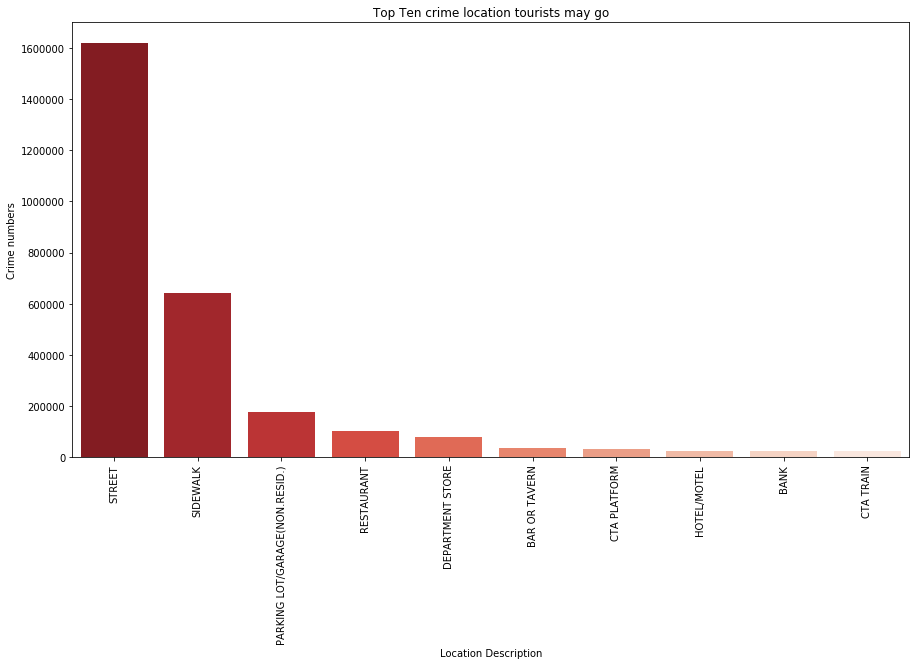

In [12]:
#ten crime location tourists may go
lot1 = data['Location Description'] == 'STREET'
lot2 = data['Location Description'] == 'SIDEWALK'
lot3 = data['Location Description'] == 'PARKING LOT/GARAGE(NON.RESID.)'
lot4 = data['Location Description'] == 'RESTAURANT'
lot5 = data['Location Description'] == 'DEPARTMENT STORE'
lot6 = data['Location Description'] == 'BAR OR TAVERN'
lot7 = data['Location Description'] == 'CTA PLATFORM'
lot8 = data['Location Description'] == 'HOTEL/MOTEL'
lot9 = data['Location Description'] == 'BANK'
lot10 = data['Location Description'] == 'CTA TRAIN'
dataft = data[lot1|lot2|lot3|lot4|lot5|lot6|lot7|lot8|lot9|lot10]
#summary the these ten location criminal situation and zip
ldft = dataft['Location Description'].unique()
ldft_2 = dataft['Location Description']
ldft_3 = []
countedft = Counter(ldft_2)
tcmost_common = countedft.most_common()
tclc = pd.DataFrame(tcmost_common, columns = ['Location with highest freq of crime tourist may go','Frequency of Crime'])
print(tclc)

xtc,ytc = zip(*tcmost_common)
xtc,ytc = list(xtc),list(ytc)
#plot for ten crime location tourists may go
plt.figure(figsize=((15,8)))
ax = sns.barplot(x = xtc, y = ytc, palette = 'Reds_r')
plt.xticks(rotation = 90)
plt.xlabel('Location Description')
plt.ylabel('Crime numbers')
plt.title('Top Ten crime location tourists may go')
plt.show()

   10 Block with highest freq of crime  Frequency of Crime
0                     100XX W OHARE ST               15433
1                     001XX N STATE ST               11921
2                   076XX S CICERO AVE                9384
3                 008XX N MICHIGAN AVE                8649
4                     0000X N STATE ST                7692
5  064XX S DR MARTIN LUTHER KING JR DR                5106
6  063XX S DR MARTIN LUTHER KING JR DR                5079
7                  0000X W TERMINAL ST                4916
8                     023XX S STATE ST                4670
9                      001XX W 87TH ST                4223


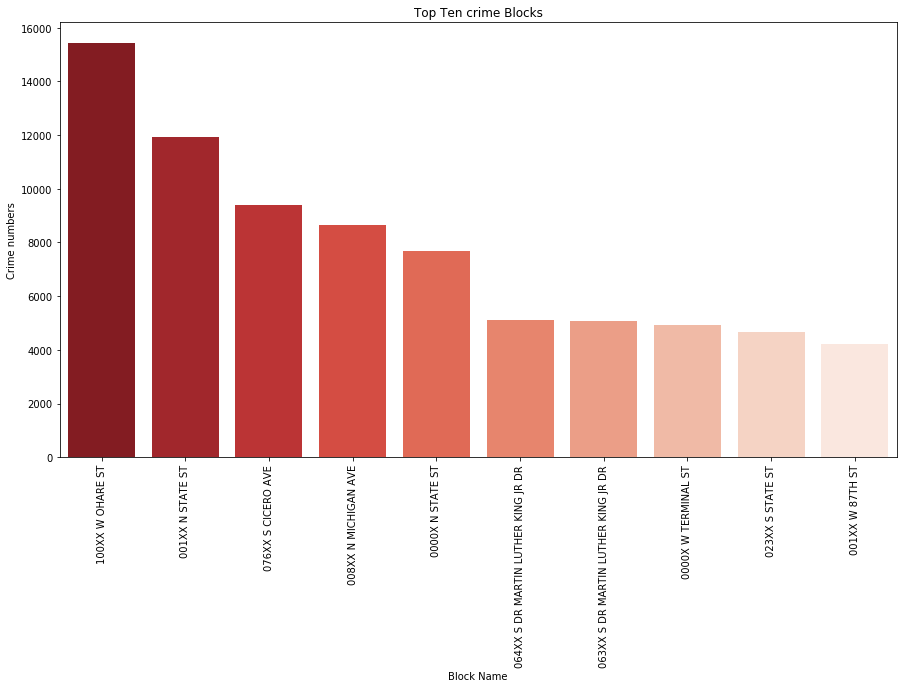

In [6]:
#summary the block and zip
block = data['Block'].unique()
block_2 = data['Block']
block_3 = []
countedblock = Counter(block_2)
bmost_common = countedblock.most_common(10)
blockm = pd.DataFrame(bmost_common, columns = ['10 Block with highest freq of crime','Frequency of Crime'])
print(blockm)

xb,yb = zip(*bmost_common)
xb,yb = list(xb),list(yb)

#plot for most common ten block
plt.figure(figsize=((15,8)))
ax = sns.barplot(x = xb, y = yb, palette = 'Reds_r')
plt.xticks(rotation = 90)
plt.xlabel('Block Name')
plt.ylabel('Crime numbers')
plt.title('Top Ten crime Blocks')
plt.show()

  10 Community with highest freq of crime  Frequency of Crime
0                                  Austin              400735
1                         Near North Side              217354
2                             South Shore              205964
3                           Humboldt Park              199400
4                          Near West Side              186407
5                               West Town              186189
6                          West Englewood              185024
7                          North Lawndale              182745
8                          Auburn Gresham              178775
9                                Roseland              168307


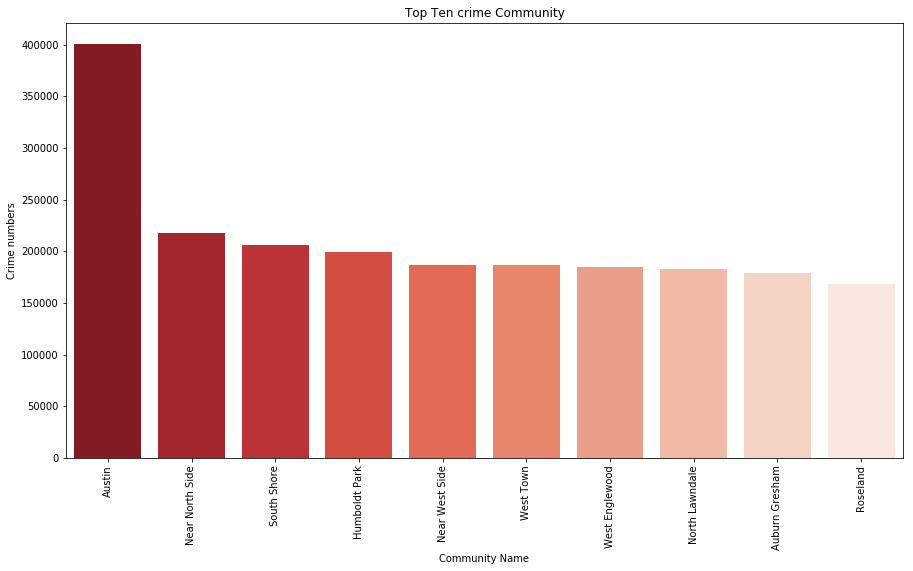

In [35]:
#summary the community and zip
community = data['Community Name'].unique()
community_2 = data['Community Name']
community_3 = []
countedcom = Counter(community_2)
commost_common = countedcom.most_common(10)
comm = pd.DataFrame(commost_common, columns = ['10 Community with highest freq of crime','Frequency of Crime'])
print(comm)

xcom,ycom = zip(*most_common)
xcom,ycom = list(xcom),list(ycom)

#plot for most common ten community
plt.figure(figsize=((15,8)))
ax = sns.barplot(x = xcom, y = ycom, palette = 'Reds_r')
plt.xticks(rotation = 90)
plt.xlabel('Community Name')
plt.ylabel('Crime numbers')
plt.title('Top Ten crime Community')
plt.show()

In [14]:
#data
#maskside = data['Community Name'] == any('Austin' or 'Near North Side' or 'South Shore' or 'Humboldt Park' or 'Near West Side' or 'West Town' or 'West Englewood' or 'North Lawndale' or 'Auburn Gresham' or 'Roseland')
#data[maskside]['Arrest']


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Police Beats,Community Name,Sides,population,income,latinos,blacks,white,asian,other
0,11760524,JC352123,07/16/2019 11:55:00 PM,002XX E 32ND ST,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,169.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
1,11761746,JC353532,07/16/2019 11:00:00 PM,035XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,GAS STATION,False,True,...,101.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
2,11760452,JC351998,07/16/2019 09:35:00 PM,035XX S RHODES AVE,0460,BATTERY,SIMPLE,STREET,False,False,...,101.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
3,11760450,JC351808,07/16/2019 07:00:00 PM,038XX S MICHIGAN AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,ALLEY,False,True,...,101.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
4,11760119,JC351662,07/16/2019 05:28:00 PM,038XX S DR MARTIN LUTHER KING JR DR,0560,ASSAULT,SIMPLE,GROCERY FOOD STORE,False,False,...,101.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
5,11761450,JC351663,07/16/2019 05:20:00 PM,035XX S RHODES AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,SIDEWALK,False,False,...,NaN,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
6,11760124,JC351513,07/16/2019 04:00:00 PM,034XX S GILES AVE,031A,ROBBERY,ARMED: HANDGUN,ALLEY,False,False,...,169.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
7,11759939,JC351451,07/16/2019 03:13:00 PM,038XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,False,...,102.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
8,11760054,JC351507,07/16/2019 02:00:00 PM,029XX S DR MARTIN LUTHER KING JR DR,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,163.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022
9,11760673,JC351159,07/16/2019 11:30:00 AM,033XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,...,169.0,Douglas,South Side,18238,32805,0.025,0.726,0.099,0.127,0.022


In [16]:
#maskside = data['Community Name'] == any('Austin' or 'Near North Side' or 'South Shore' or 'Humboldt Park' or 'Near West Side' or 'West Town' or 'West Englewood' or 'North Lawndale' or 'Auburn Gresham' or 'Roseland')

# Values of each group
arrestedtop10 = data[data['Arrest']==1]
arrestedtop10 = pd.DataFrame(arrestedtop10)
unarrestedtop10 = data[data['Arrest']==0]
unarrestedtop10 = unarrestedtop10.values 
# Heights of bars1 + bars2
bars = np.add(arrestedtop10, unarrestedtop10).tolist()
 
#, The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10]
 
# Names of group and bar width
names = xcom
barWidth = 1
 
# Create brown bars
plt.bar(r, arrestedtop10, color='#58D68D', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, unarrestedtop10, color='#F1948A', edgecolor='white', width=barWidth)

 
# Custom X axis
plt.xticks(r, names, rotation = 90)
plt.xlabel("group")
 
# Show graphic
plt.show()


ValueError: operands could not be broadcast together with shapes (1725755,39) (4583037,39) 

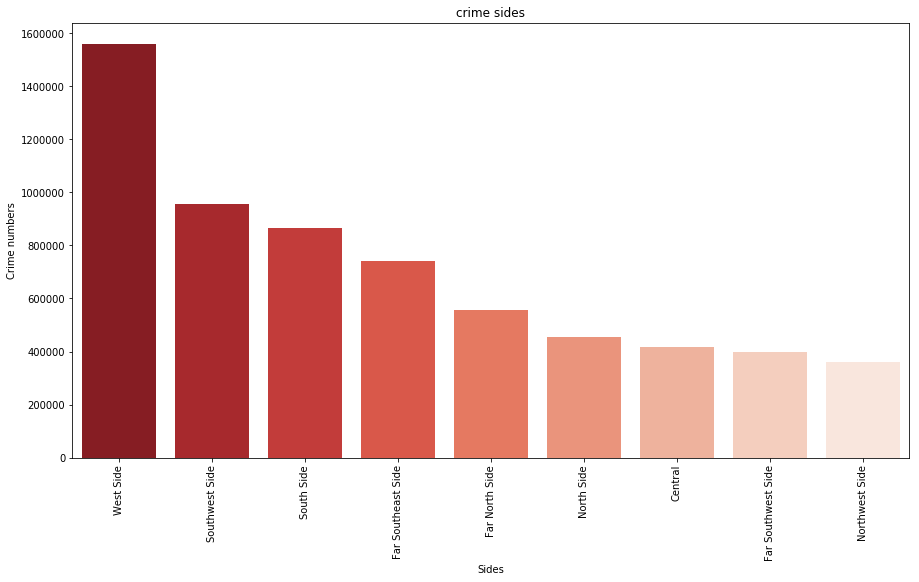

In [7]:
#summary the side and zip
side = data['Sides'].unique()
side_2 = data['Sides']
side_3 = []
countedsid = Counter(side_2)
most_common = countedsid.most_common()
xsid,ysid = zip(*most_common)
xsid,ysid = list(xsid),list(ysid)

#plot for most common ten block
plt.figure(figsize=((15,8)))
ax = sns.barplot(x = xsid, y = ysid, palette = 'Reds_r')
plt.xticks(rotation = 90)
plt.xlabel('Sides')
plt.ylabel('Crime numbers')
plt.title('crime sides')
plt.show()

In [2]:
#analysis crime summary in West side
westside = data['Sides'] == 'West Side'
dataw = data[westside]
wcrimes = dataw['Primary Type'].unique()
wcrimes_2 = data['Primary Type']
wcrimes_3 = []
countedwcr = Counter(wcrimes_2)
most_common = countedwcr.most_common(10)
dfwestcrime = pd.DataFrame(most_common, columns = ['Crime Type','Crime Frequency'])
print(dfwestcrime)

xwcr,ywcr = zip(*most_common)
xwcr,ywcr = list(xwcr),list(ywcr)

#plot for Top 10 Common Crime in West Side
plt.figure(figsize=((15,8)))
ax = sns.barplot(x = xwcr, y = ywcr, palette = 'autumn')
plt.xticks(rotation = 90)
plt.xlabel('Crime Type')
plt.ylabel('Crime numbers')
plt.title('Top 10 Common Crime in West Side')
plt.show()

NameError: name 'data' is not defined

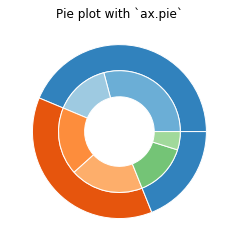

In [20]:
fig, ax = plt.subplots()

size = 0.3 #ring
#try with zip arrest/unarrest vs. different area: top3
vals = np.array([[60., 30.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()